Missing data for 2021-05-04 00:00:00


<ipython-input-2-c896f35eee6b>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


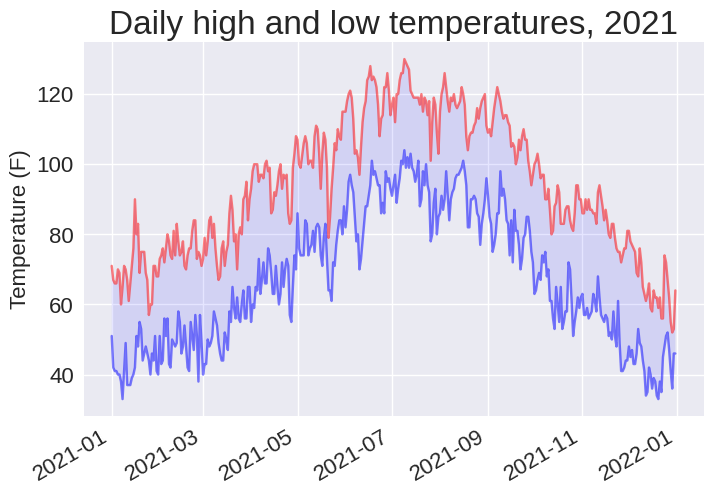

In [ ]:


from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt

path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try: # Indent the try block to be part of the for loop
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates,highs, c='red', alpha=0.5)
ax.plot(dates,lows, c='blue',alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
ax.set_title("Daily high and low temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()